# Claims Severity Prediction Using Machine Learning

# Business Problem

In the life-cycle of insurance, when the insured incurred a loss and notify the insurer, the process in called FNOL (First Notice of Loss). When a FNOL hits the insurer'system it is important to identify the complexity/severity of the claim. At present general insurance carriers spend almost 40% of the claim life cycle's time in the process of assigning and re-assigning the claims to the adjusters based on changing complexity level and adjuster's experience. Big insurance carriers sit on a gold mine of historical data, which can be utilized to predict the complexity of a claim using the power of machine learning/AI.

One of the key attributes of the process is correctly identifying the cost that can occur in a claim. 

This is why Allstate, a personal insurer in the United States, is continually seeking fresh ideas to improve their claims service for the over 16 million households they protect.

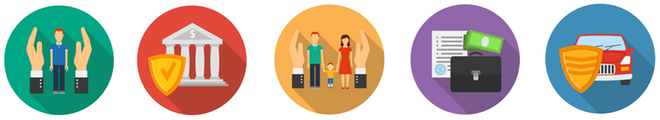


Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims.

The ability to correctly predict the cost that can occur in a claim helps both the Insurer and Insured greatly. Insurer can assign the claims to experienced claim adjusters based on severity for faster processing, reserve on claims also set be set properly using a data driven approach. 

For example, if a claim is severe it can be assigned to an experienced claim handlers, similarty non severe/ lower complexity claims can be directly channelized to payment. Most of the leading digital P&C products like Guidewire, Duckceek has in-built hook up points to asssign claim's complexity using rule based engines or calling external APIs. So we can also deploy the model as REST endpoints and integrate with the systems easily.     


## Business-ML Problem Mapping

We can map this problem with a Regression problem of machine Learning, where we will predict the cost that may occur in the claim and based on the predicted cost we can segment the claim's severity


Machine Learning Problem Class: Regression

Problem Statement: Predict the severity class of the claim based on probable cost

## Other Business Requirments

1. Some sort of interpretibity of the model is desired, it helps carriers to identify key factor behind a claim's severity
2. The is no specific latency requirment

## KPI
1. Mean absolute Error (It's more robust to outlier, our data may contain outliers)
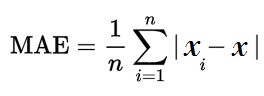

### Other key metrices used in Regression:
RMSE
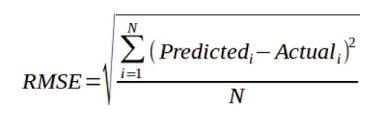
Adjusted R Square 
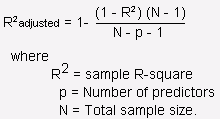

#### Difference between R-Square and Adjusted R-Square from
https://discuss.analyticsvidhya.com/t/difference-between-r-square-and-adjusted-r-square/264/2

-----------------------------------------------------------------
R-squared or R2 explains the degree to which your input variables explain the variation of your output / predicted variable. So, if R-square is 0.8, it means 80% of the variation in the output variable is explained by the input variables. So, in simple terms, higher the R squared, the more variation is explained by your input variables and hence better is your model.

However, the problem with R-squared is that it will either stay the same or increase with addition of more variables, even if they do not have any relationship with the output variables. This is where “Adjusted R square” comes to help. Adjusted R-square penalizes you for adding variables which do not improve your existing model.

Hence, if you are building Linear regression on multiple variable, it is always suggested that you use Adjusted R-squared to judge goodness of model. In case you only have one input variable, R-square and Adjusted R squared would be exactly same.

#### Comparing  different metrics used in Regression
https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e


1. Mean Squared Error(MSE) and Root Mean Square Error penalizes the large prediction errors vi-a-vis Mean Absolute Error (MAE). However, RMSE is widely used than MSE to evaluate the performance of the regression model with other random models as it has the same units as the dependent variable (Y-axis).
2. MSE is a differentiable function that makes it easy to perform mathematical operations in comparison to a non-differentiable function like MAE. Therefore, in many models, RMSE is used as a default metric for calculating Loss Function despite being harder to interpret than MAE.
3. MAE is more robust to data with outliers.
4. The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.
5. R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable. R Squared value always increases with the addition of the independent variables which might lead to the addition of the redundant variables in our model. However, the adjusted R-squared solves this problem.
6. Adjusted R squared takes into account the number of predictor variables, and it is used to determine the number of independent variables in our model. The value of Adjusted R squared decreases if the increase in the R square by the additional variable isn’t significant enough.
7. For comparing the accuracy among different linear regression models, RMSE is a better choice than R Squared.

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import sklearn 
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Screening

In [3]:
data=pd.read_csv('train.csv',error_bad_lines=False)

b'Skipping line 188321: expected 132 fields, saw 133\nSkipping line 188322: expected 132 fields, saw 133\nSkipping line 188323: expected 132 fields, saw 133\nSkipping line 188324: expected 132 fields, saw 133\nSkipping line 188325: expected 132 fields, saw 133\nSkipping line 188326: expected 132 fields, saw 133\nSkipping line 188327: expected 132 fields, saw 133\nSkipping line 188328: expected 132 fields, saw 133\nSkipping line 188329: expected 132 fields, saw 133\nSkipping line 188330: expected 132 fields, saw 133\nSkipping line 188331: expected 132 fields, saw 133\nSkipping line 188332: expected 132 fields, saw 133\nSkipping line 188333: expected 132 fields, saw 133\nSkipping line 188334: expected 132 fields, saw 133\nSkipping line 188335: expected 132 fields, saw 133\nSkipping line 188336: expected 132 fields, saw 133\nSkipping line 188337: expected 132 fields, saw 133\nSkipping line 188338: expected 132 fields, saw 133\nSkipping line 188339: expected 132 fields, saw 133\nSkipping l

In [4]:
data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1.0,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2.0,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5.0,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10.0,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11.0,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


### Shape of the data 

In [5]:
data.shape

(188319, 132)

### Variables

In [6]:
data.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [7]:
cat_columns=[ele for ele in data.columns if 'cat' in ele]
cont_columns=[ele for ele in data.columns if 'cont' in ele]
print('No of categorical variables:',len(cat_columns))
print('No of numerical variables:',len(cont_columns))

No of categorical variables: 116
No of numerical variables: 14


### Handling Missing Values 

In [31]:
data.isna().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    1
cont12    1
cont13    1
cont14    1
loss      1
Length: 132, dtype: int64

There is only one missing value in the dataset, we can safely remove it

In [4]:
data=data.dropna()

In [33]:
data.isna().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

### Separating Independent and Dependent Variables

In [5]:
y=data.loss
x=data.drop(columns=['loss','id'])

# Exploratory Data Analysis

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

### Understanding the Target Variable( 'loss') closely - univariate analysis

In [10]:
y.describe()

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

<AxesSubplot:xlabel='loss', ylabel='Density'>

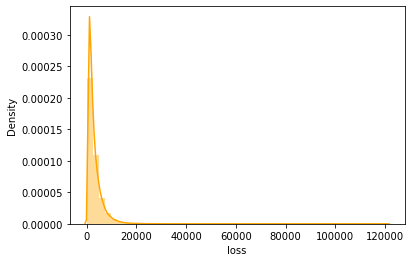

In [76]:
# distribution of the variable
sns.distplot(y,color='orange')

The distribution is right skewed, with a long tail at right. There can also be potential outliers at the extreme right region. Let's see if we can transform the variable in to a log normal distribution

<AxesSubplot:xlabel='loss', ylabel='Density'>

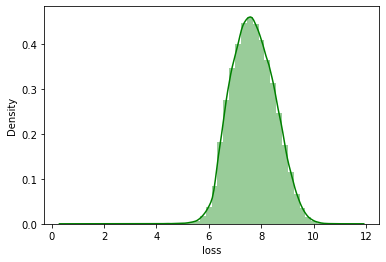

In [37]:
# distribution of the variable
sns.distplot(np.log1p(y),color='green')

log(loss) variable seems to follow the normal distribution

<AxesSubplot:xlabel='loss'>

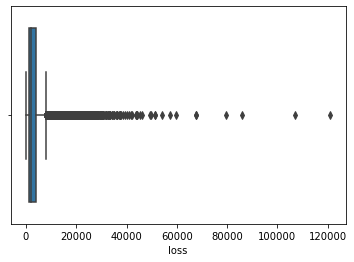

In [33]:
# boxplot
sns.boxplot(y)

50% datapoints lies within: 2115.5699999999997
75% datapoints lies within: 3864.045
90% datapoints lies within: 6401.743
95% datapoints lies within: 8508.536499999998
98% datapoints lies within: 11515.183800000013


<AxesSubplot:>

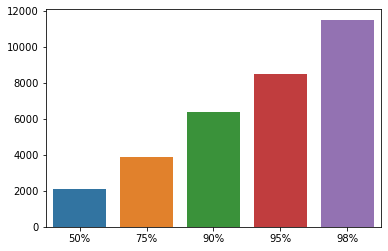

In [63]:
print('50% datapoints lies within:',np.percentile(y, 50))
print('75% datapoints lies within:',np.percentile(y, 75))
print('90% datapoints lies within:',np.percentile(y, 90))
print('95% datapoints lies within:',np.percentile(y, 95))
print('98% datapoints lies within:',np.percentile(y, 98))
per_x=['50%','75%','90%','95%','98%']
per_y=[np.percentile(y, 50),np.percentile(y, 75),np.percentile(y, 90),np.percentile(y, 95),np.percentile(y, 98)]
sns.barplot(per_x,per_y)

#### Observation(s):
1. The variable is distributed between 0.67 to 121012.25 with a mean of 3037.33 and standard deviation of 2904.086186

2. The distribution has a long tail at the right side, the median value is 2115

3. 75% of the claim losses lies within 3864.045000

4. 98% of the claim losses lies within 11515

## Understanding the correlation

<AxesSubplot:>

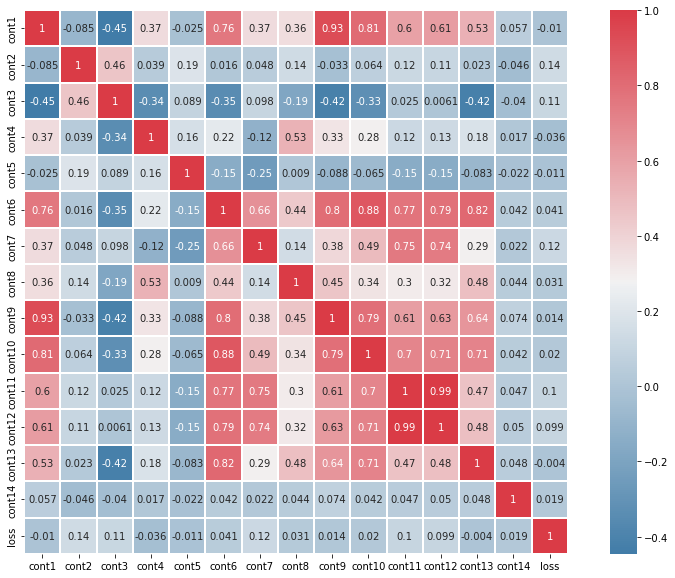

In [72]:
f, ax = plt.subplots(figsize=(15, 10))
corr = data.drop(columns=['id']).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax,annot=True,linewidth=2)

#### Observation(s):

1. Cont11 and Cont12 variables are highly correlated (>0.9), hence we can drop one of them
2. Cont1 and Cont9 variables are highly correlated (>0.9)
3. Cont6 and Cont9 variables are moderately correlated (>0.8)

## Exploring Categorical Variables

In [12]:
# number of categorical features
len(cat_columns)

116

In [35]:
data

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1.0,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2.0,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5.0,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10.0,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11.0,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620.0,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624.0,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630.0,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632.0,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


#### Number of levels in categorical features

In [45]:
cat_levels=[len(data[col].unique()) for col in cat_columns]

In [7]:
def get_plt():
    fig = plt.figure(figsize =(20, 5))
    plt.xlabel('Categories',fontsize=14)
    plt.ylabel('Numbers of levels',fontsize=14)
    plt.title('Categories vs Number of levels',fontsize=14)
    plt.xticks(rotation = 45,size = 12)
    plt.grid()
    return plt

<BarContainer object of 35 artists>

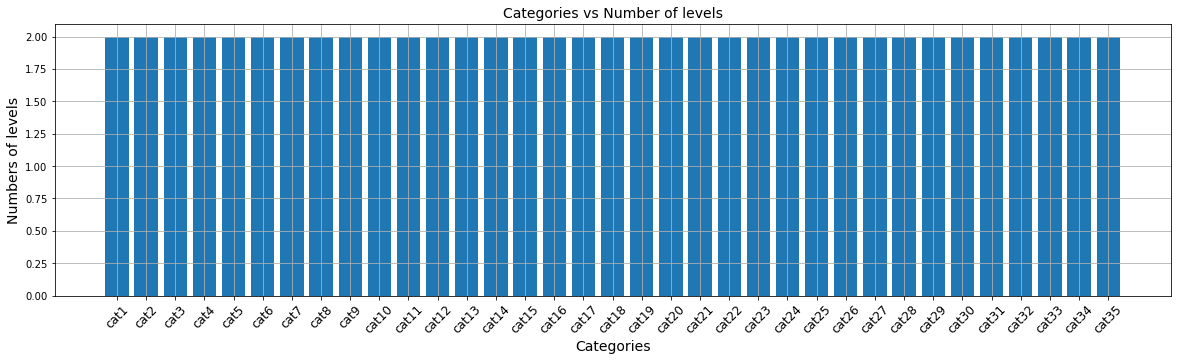

In [85]:
plt=get_plt()
plt.bar(cat_columns[:35],cat_levels[:35])

<BarContainer object of 35 artists>

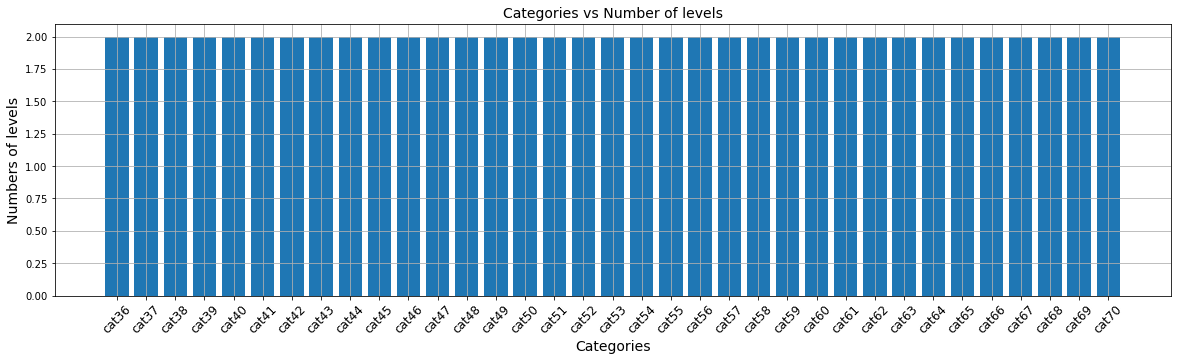

In [86]:
plt=get_plt()
plt.bar(cat_columns[35:70],cat_levels[35:70])

<BarContainer object of 30 artists>

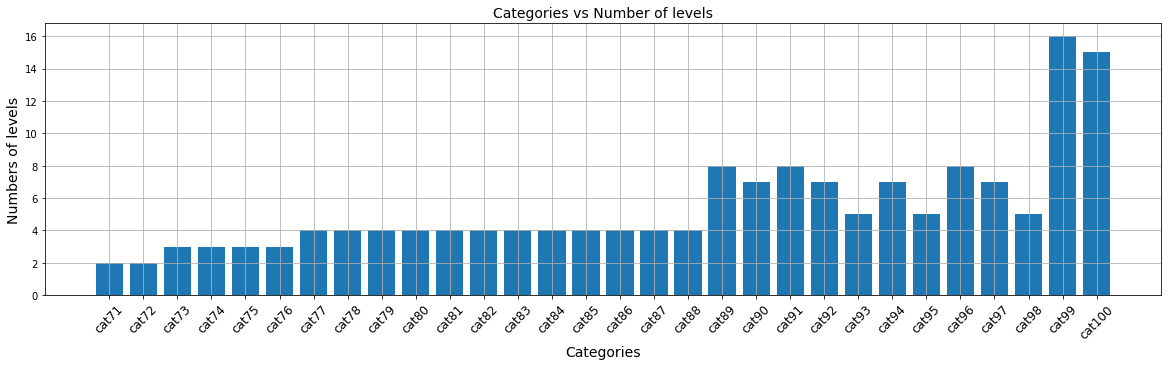

In [87]:
plt=get_plt()
plt.bar(cat_columns[70:100],cat_levels[70:100])

<BarContainer object of 16 artists>

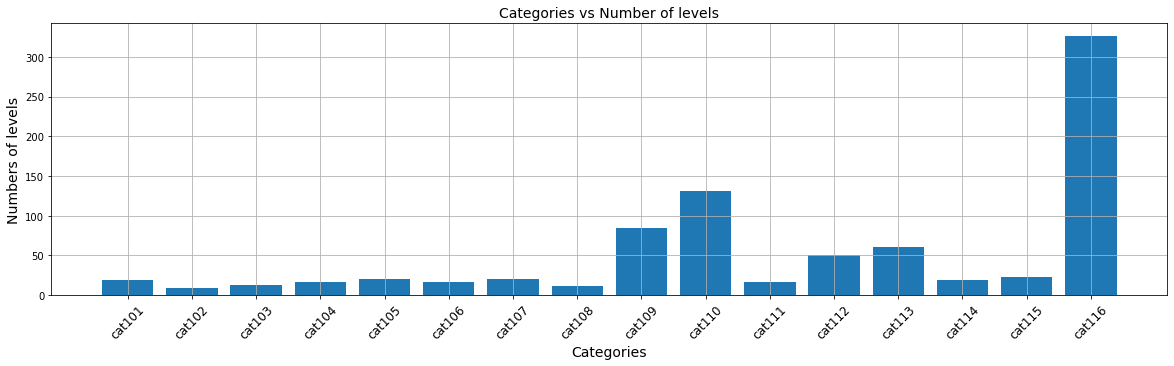

In [88]:
plt=get_plt()
plt.bar(cat_columns[100:116],cat_levels[100:116])

70 categorical variables have only two unique values, <b>cat116</b> has maximum no of levels with cardinality>300, we need to think about how can we encode the categorical variable efficiently


| Categories | Highest number of Levels |
| --- | --- |
| 0-70 | 2|
| 71-88 | 4|
| 89-98 | 8|
| 99-108 | 16|
| 109-110 | 140|
| 111-115 | 52|
| 116 | 326|


#### Feature selection 

Understanding all of these categorical varibale will be time consuming, so instead Let's select top 10 categorical features(based on feature importance) using a tree based model and analyze them.

In [7]:
# importing necessary libraries
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [9]:
# importing models for label encoding and feature selection
model=RandomForestRegressor()
le = preprocessing.LabelEncoder()

In [10]:
# make acopy of data sample
x_encoded=x.copy()

In [23]:
# transform the categorical features using label encoding
for col in cat_columns:
    le = preprocessing.LabelEncoder()
    x_encoded[col]=le.fit_transform(x_encoded[col])

In [24]:
# fit the data in random forest regression model
model.fit(x_encoded,y)

RandomForestRegressor()

<function matplotlib.pyplot.show(close=None, block=None)>

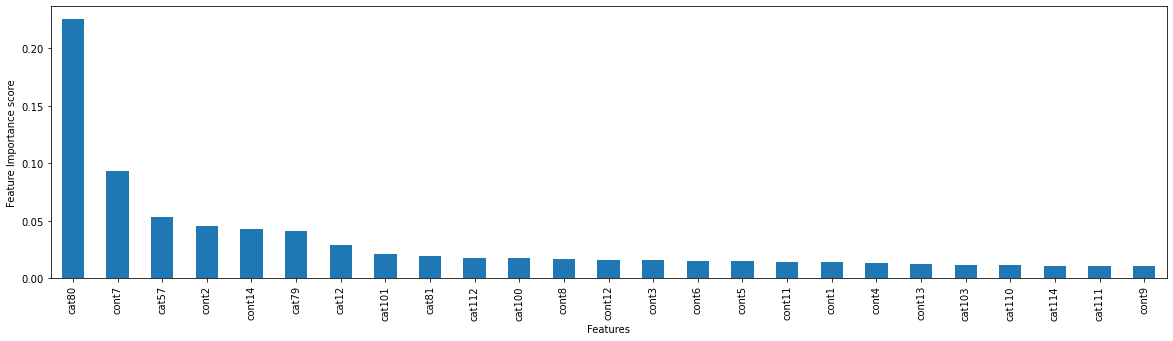

In [29]:
# get the feature importance
feature_imp = model.feature_importances_
# plot 25 most important features
fig = plt.figure(figsize =(20, 5))
ranked_feature = pd.Series(model.feature_importances_,index = x_encoded.columns)
ranked_feature.nlargest(25).plot(kind = 'bar')
plt.ylabel('Feature Importance score')
plt.xlabel('Features')
plt.show

In [40]:
# isolate top 10 categorical and continous features
top_cat_features=[ele for ele in ranked_feature.nlargest(25).index if 'cat' in ele][:10]
top_cont_features=[ele for ele in ranked_feature.nlargest(25).index if 'cont' in ele][:10]
top_cat_features

['cat80',
 'cat57',
 'cat79',
 'cat12',
 'cat101',
 'cat81',
 'cat112',
 'cat100',
 'cat103',
 'cat110']

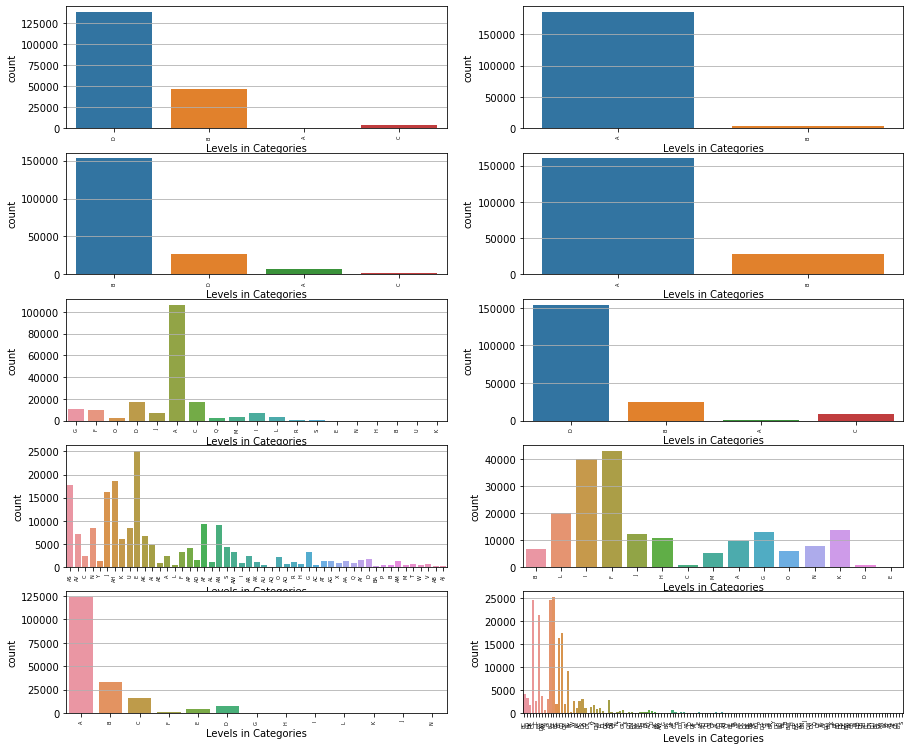

In [57]:
# plotting the number of matching datapoints for each valid value of top categories
fig= plt.subplots(figsize=(15,13))
for i,cat in enumerate(top_cat_features):
    unique_levels=x[cat].unique()
    num_rows_per_level=[len(data[data[cat]==val]) for val in unique_levels]
    plt.subplot(5,2,i+1)
    plt.xticks(rotation = 90,size = 5)
    plt.grid()
    plt.xlabel('Levels in Categories',fontsize=10)
    plt.ylabel('count',fontsize=10)
    sns.barplot(unique_levels,num_rows_per_level)


#### Observation(s):

We can list down the followings observations from the EDA of categorical valiables:

1. 'cat80','cat57','cat79','cat12','cat101','cat81','cat112','cat100','cat103','cat110' are the top 10 most important categorical features

2. number of levels for the categorical variables are not same, some has only 2 levels while some has more than 300

3. levels at top categorical features are not uniformly distributed

4. we can not confirm if the categorical variables are ordinal or nominal. So labelencoding may not be the right option here

5. on the other side some categorical variable has a high cardinality, one hot endoing will increase the number of features drastically, we may try out a combination of OHE followed by PCA 

6. we can try out another encoding approach for high cardinal variables - select top 10/20 most frequent levels of the variable and use only these levels as feature while converting to OHE (https://www.youtube.com/watch?v=6WDFfaYtN6s). we can put out zeroes for other non frequent levels 

## Exploring Numerical Variables

In [8]:
# number of continous variables
len(cont_columns)

14

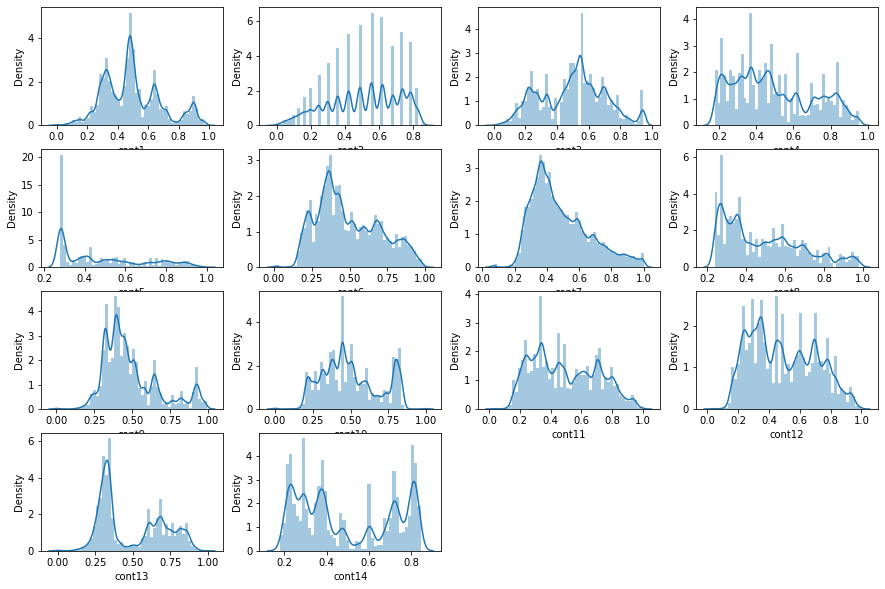

In [10]:
# plotting the distribution
fig= plt.subplots(figsize=(15,10))
for i,col in enumerate(cont_columns):
    plt.subplot(4,4,i+1)
    sns.distplot(x[col])

None of the continuos independent variables are normally distributed, let's try out various transformation techniques

#### Log Transformation

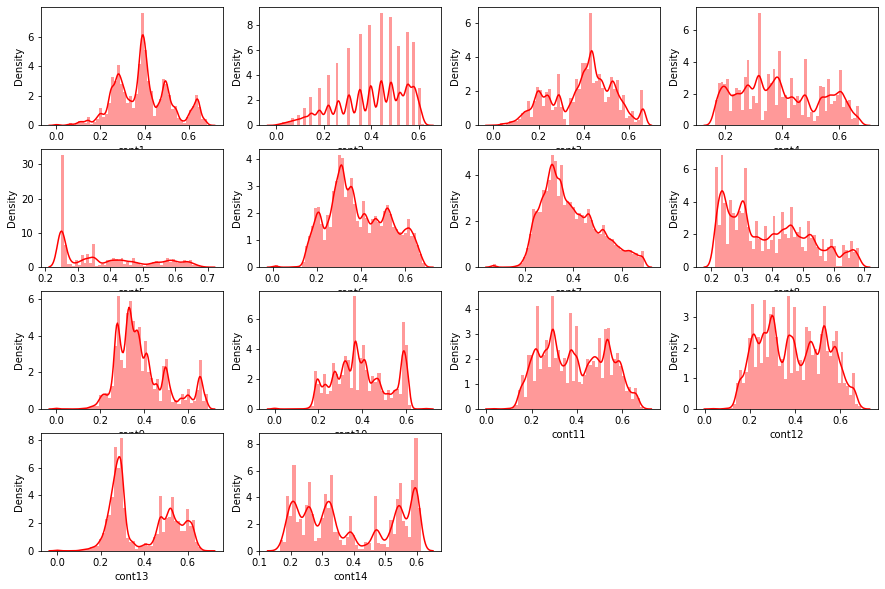

In [10]:
fig= plt.subplots(figsize=(15,10))
for i,col in enumerate(cont_columns):
    plt.subplot(4,4,i+1)
    sns.distplot(np.log1p(x[col]),color='red')

#### Boxcox Transformation

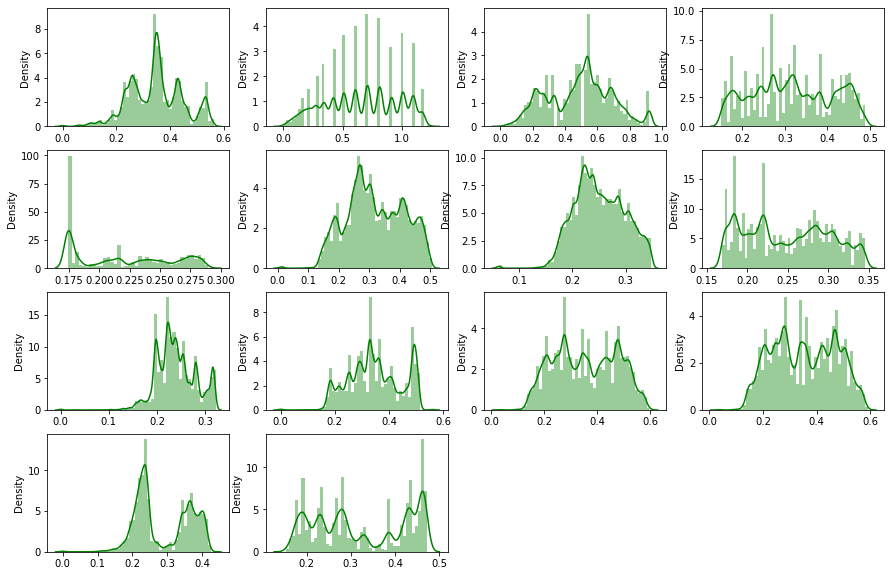

In [29]:
fig= plt.subplots(figsize=(15,10))
for i,col in enumerate(cont_columns):
    plt.subplot(4,4,i+1)
    transformed_data, _ = stats.boxcox(x[col]+1)
    sns.distplot(transformed_data,color='green')

#### Exponential Transformation

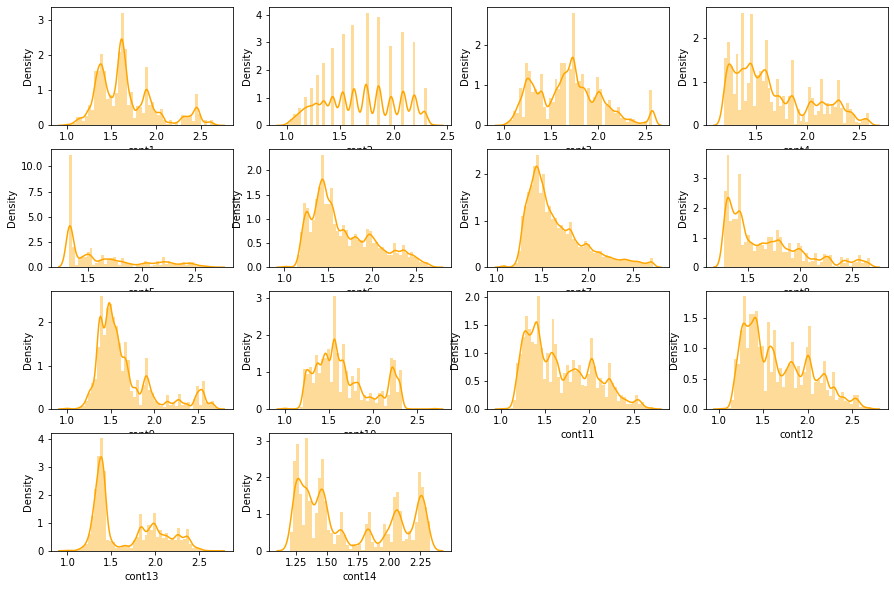

In [30]:
fig= plt.subplots(figsize=(15,10))
for i,col in enumerate(cont_columns):
    plt.subplot(4,4,i+1)
    sns.distplot(np.exp(x[col]),color='orange')

#### Checking linear reletionship using scatter plot

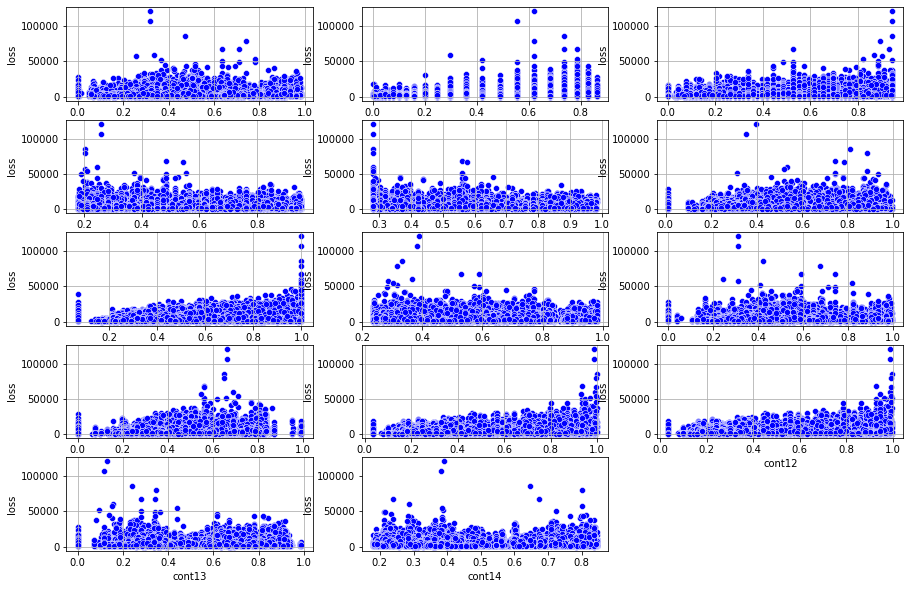

In [43]:
fig= plt.subplots(figsize=(15,10))
for i,col in enumerate(cont_columns):
    plt.grid()
    plt.subplot(5,3,i+1)
    sns.scatterplot(x[col],y,color='blue')

We can observe some linear relationship among the dependent and independent variables, there are some extreme values in each of the dependent variables  

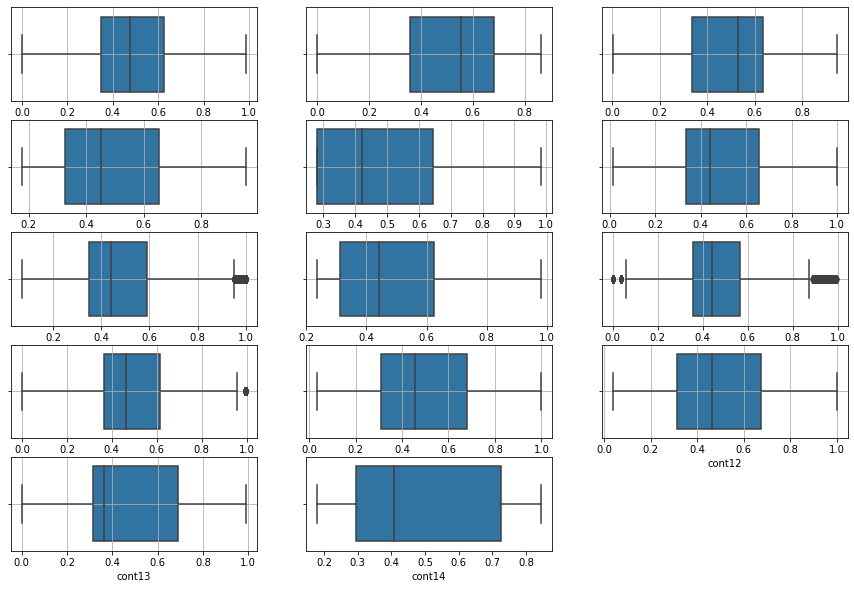

In [44]:
fig= plt.subplots(figsize=(15,10))
for i,col in enumerate(cont_columns):
    plt.grid()
    plt.subplot(5,3,i+1)
    sns.boxplot(x[col])

#### Observation(s):

1. Cont11 and Cont12 variables are highly correlated (>0.9), hence we can drop one of them
2. Cont1 and Cont9 variables are highly correlated (>0.9)
3. Cont6 and Cont9 variables are moderately correlated (>0.8)
4. We can set a threshold for correlation and drop one of the correlated features above it
5. The values of all the numerical variables lie between the range of 0 and 1


## Spliting the Data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30, random_state=42)
print('No of training data points:',len(y_train))
print('No of validation data points:',len(y_val))

No of training data points: 131822
No of validation data points: 56496


In [63]:
x_train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
183712,A,A,A,B,B,A,A,A,A,A,...,0.902259,0.385965,0.436463,0.51256,0.29269,0.32446,0.453334,0.443374,0.354344,0.314671
145303,A,B,A,A,B,A,A,A,B,A,...,0.281143,0.613589,0.529115,0.43518,0.50420,0.55533,0.396226,0.387819,0.689974,0.251504
90371,B,A,A,A,B,A,A,A,A,A,...,0.288217,0.530598,0.740651,0.37194,0.50420,0.34928,0.853569,0.852865,0.336261,0.797883
158105,A,A,A,A,A,B,A,A,A,A,...,0.281143,0.197932,0.279299,0.41762,0.26401,0.23545,0.207238,0.204687,0.271571,0.283278
185615,B,A,A,A,B,A,A,A,A,A,...,0.281143,0.700430,0.544820,0.87698,0.52100,0.61459,0.727671,0.714544,0.782450,0.807969


## Data Preparation (Feature Engineering)

#### Option1: One Hot Encoding with level reducing

We have some high cardinal categorical features in our dataset, if we use vanila OHE it will increase the dimentionality greatly. One option is to select some of the most frequenltly occuring levels as feature and replace the less frequent levels with a single level.

In [51]:
def encode_cat_variable(cat=x['cat116'],threshold=0.75):
    # calculate number of unique levels
    num_unique_values=len(cat.unique())
    # calculate list of mos frequent levels above threshold
    top_levels=cat.value_counts().index[:int(num_unique_values*threshold)]
    # replace less frequent levels with a single level 'OTH'
    cat=['OTH'  if ele not in top_levels else ele for ele in cat]
    # create dummy variables
    cat=pd.Series(cat)
    return pd.get_dummies(cat,drop_first=True)

In [52]:
encode_cat_variable(threshold=0.50).head()

,AJ,AO,BD,BO,BP,BV,BX,BY,CB,CD,...,MC,MD,ME,MG,MI,MJ,MP,MQ,MU,OTH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Considering we have 116 categorical features, it will still create a lot of dummy features

#### Option2: Target Mean Encoding

“features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.”

Each level of the features are here replaced with mean of the target. It is prone to overfitting when the distribution of the categorical features in the train and the test dataset are considerably different.

In [8]:
from category_encoders import TargetEncoder, BinaryEncoder

In [12]:
enc=TargetEncoder(cols=cat_columns)
x_train_=enc.fit_transform(x_train,y_train)

In [102]:
x_train_.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
183712,3407.476287,2454.357926,2897.649978,3483.832882,3461.830574,3259.429072,2905.9861,2971.393491,2510.533072,2691.627067,...,0.902259,0.385965,0.436463,0.51256,0.29269,0.32446,0.453334,0.443374,0.354344,0.314671
145303,3407.476287,3794.906310,2897.649978,2826.072472,3461.830574,3259.429072,2905.9861,2971.393491,3824.733051,2691.627067,...,0.281143,0.613589,0.529115,0.43518,0.50420,0.55533,0.396226,0.387819,0.689974,0.251504
90371,1905.109422,2454.357926,2897.649978,2826.072472,3461.830574,3259.429072,2905.9861,2971.393491,2510.533072,2691.627067,...,0.288217,0.530598,0.740651,0.37194,0.50420,0.34928,0.853569,0.852865,0.336261,0.797883
158105,3407.476287,2454.357926,2897.649978,2826.072472,2812.431871,2510.587520,2905.9861,2971.393491,2510.533072,2691.627067,...,0.281143,0.197932,0.279299,0.41762,0.26401,0.23545,0.207238,0.204687,0.271571,0.283278
185615,1905.109422,2454.357926,2897.649978,2826.072472,3461.830574,3259.429072,2905.9861,2971.393491,2510.533072,2691.627067,...,0.281143,0.700430,0.544820,0.87698,0.52100,0.61459,0.727671,0.714544,0.782450,0.807969


#### Option3: Binary Encoding

In [16]:
enc=BinaryEncoder(cols=cat_columns)
x_train_bn=enc.fit_transform(x_train,y_train)
x_val_bn=enc.transform(x_val,y_val)
x_train_bn.head()

,cat1_0,cat1_1,cat2_0,cat2_1,cat3_0,cat3_1,cat4_0,cat4_1,cat5_0,cat5_1,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
183712,0,1,0,1,0,1,0,1,0,1,...,0.902259,0.385965,0.436463,0.51256,0.29269,0.32446,0.453334,0.443374,0.354344,0.314671
145303,0,1,1,0,0,1,1,0,0,1,...,0.281143,0.613589,0.529115,0.43518,0.50420,0.55533,0.396226,0.387819,0.689974,0.251504
90371,1,0,0,1,0,1,1,0,0,1,...,0.288217,0.530598,0.740651,0.37194,0.50420,0.34928,0.853569,0.852865,0.336261,0.797883
158105,0,1,0,1,0,1,1,0,1,0,...,0.281143,0.197932,0.279299,0.41762,0.26401,0.23545,0.207238,0.204687,0.271571,0.283278
185615,1,0,0,1,0,1,1,0,0,1,...,0.281143,0.700430,0.544820,0.87698,0.52100,0.61459,0.727671,0.714544,0.782450,0.807969


#### Option4: K-Fold Target Encoding

https://medium.com/@pouryaayria/k-fold-target-encoding-dfe9a594874b

We can use k- fold target encoding to get rid off the overfitting. Here we divide the dataset in to k folds, for each iteration we use k-1 folds to estimate the value of kth folds.
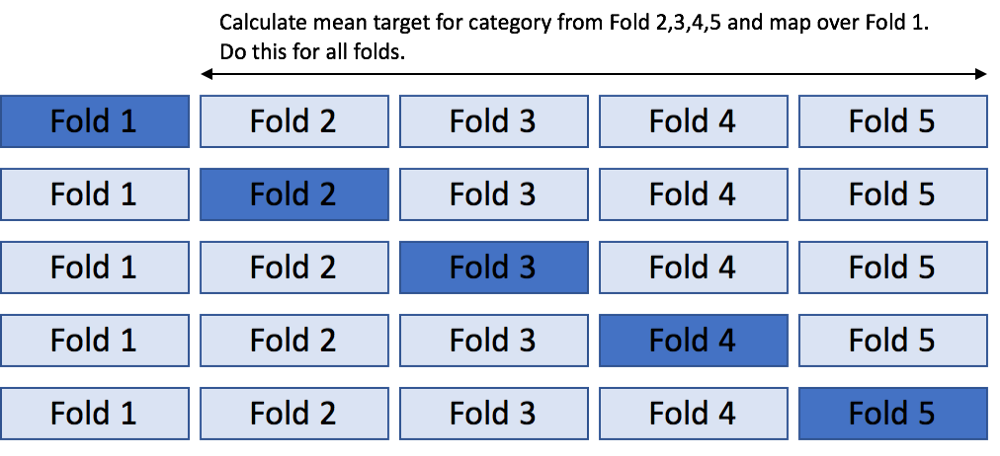

In [17]:
#https://medium.com/@pouryaayria/k-fold-target-encoding-dfe9a594874b
#https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study
#https://www.kaggle.com/vchoubey/random-forest-mean-encoding-for-app-channel


'''
Regularization:

label(c) = (pc∗nc + pglobal∗α)/(nc+α)

pc :  is a target mean for a category
nc : is a number of samples in a category
pglobal :  is a global target mean
α : is a regularisation parameter that can be viewed as a size of a category you can trust
'''

from sklearn.model_selection import KFold


def mean_train_encoding_trial(df, y_tr,target,cols,global_target_mean,alpha):
    # divide the dataset in to 5 folds
    y_tr = df[target].values
    skf = KFold(5, shuffle = True, random_state=123)
    # make a copy of the dataset
    df_copy = df.copy()
    
    # for each split get the train and validation indices
    for trn_ind , val_ind in skf.split(df,y_tr):
        x_tr, x_val =  df_copy.iloc[trn_ind], df_copy.iloc[val_ind]
        # calculate the encoding value for val dataset using train dataset 
        for col in cols:
            tr_mean = x_tr.groupby(col)[target].agg(['count','mean'])
            # a = target mean of a category * no of datapoints of that category + global target avg. * alpha
            a = (tr_mean['count']*tr_mean['mean'])+(global_target_mean*alpha)
            # b = number of samples in a category + alpha
            b = (tr_mean['count'] + alpha)
            encoded = a/b
            # assign the encoded value in the validation set
            mean = x_val[col].map(encoded)
            # set the encoding value in the main dataset
            df_copy[col].iloc[val_ind] = mean
    prior = global_target_mean
    # replace the null values with global mean of the target
    for col in cols:
        df_copy[col].fillna(prior, inplace = True)   
    return df_copy

In [18]:
# encoding training data
x_train['target']=y_train
x_train=mean_train_encoding_trial(x_train,y_train,'target',cat_columns,np.mean(y_train),20)
x_train=x_train.drop(columns=['target'])
x_train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
183712,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,...,0.902259,0.385965,0.436463,0.51256,0.29269,0.32446,0.453334,0.443374,0.354344,0.314671
145303,3413.344725,3809.194338,2901.761317,2825.056873,3466.258098,3275.344683,2911.140859,2980.426825,3841.685574,2689.025551,...,0.281143,0.613589,0.529115,0.43518,0.50420,0.55533,0.396226,0.387819,0.689974,0.251504
90371,1917.526336,2450.516029,2899.917835,2826.458065,3465.600862,3264.620567,2910.434305,2976.468426,2506.387997,2687.947810,...,0.288217,0.530598,0.740651,0.37194,0.50420,0.34928,0.853569,0.852865,0.336261,0.797883
158105,3418.023947,2442.665932,2894.959572,2800.430390,2811.360632,2530.495976,2904.509783,2978.027894,2498.997167,2684.582437,...,0.281143,0.197932,0.279299,0.41762,0.26401,0.23545,0.207238,0.204687,0.271571,0.283278
185615,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,3034.978839,...,0.281143,0.700430,0.544820,0.87698,0.52100,0.61459,0.727671,0.714544,0.782450,0.807969


In [19]:
# encoding validation dataset
x_val['target']=y_val
x_val=mean_train_encoding_trial(x_val,y_val,'target',cat_columns,np.mean(y_val),20)
x_val=x_val.drop(columns=['target'])
x_val.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
10168,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,...,0.473767,0.817706,0.480176,0.90055,0.84847,0.80218,0.550529,0.590961,0.814573,0.721577
6936,3407.685015,2443.956073,2907.940673,2825.390080,2819.535135,2536.988531,2911.992536,2980.865630,2504.506830,2694.737253,...,0.281143,0.687443,0.499166,0.54236,0.50420,0.51111,0.698978,0.685713,0.695650,0.721610
39511,3416.912589,2460.042598,2909.581754,2813.844240,3517.764373,3249.276506,2912.750329,2969.689327,2524.672980,2713.329170,...,0.281143,0.398017,0.376655,0.26847,0.39849,0.57172,0.492200,0.481306,0.243546,0.739873
40087,3416.912589,3778.023628,5273.577090,2813.844240,2791.031708,3249.276506,2912.750329,2969.689327,3792.172916,4854.012771,...,0.551723,0.452280,0.618522,0.31280,0.44352,0.53328,0.771508,0.758883,0.336261,0.234612
117312,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,3042.841577,...,0.397069,0.394921,0.374803,0.24564,0.46853,0.50556,0.453334,0.443374,0.263731,0.757043


In [20]:
# dropping the correlated continuous features
x_train=x_train.drop(columns=['cont12','cont9'])
x_val=x_val.drop(columns=['cont12','cont9'])
x_train_bn=x_train_bn.drop(columns=['cont12','cont9'])
x_val_bn=x_val_bn.drop(columns=['cont12','cont9'])
x_train_cfe=x_train_cfe.drop(columns=['cont12','cont9'])
x_val_cfe=x_val_cfe.drop(columns=['cont12','cont9'])

## Modelling

### Baseline Model - Median Predictor

In [21]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold,cross_val_score

In [22]:
# calculate adjusted R-Square score
def adj_r2_score(X,y_true,y_pred):
    Adj_r2 = 1 - (1-r2_score(y_true, y_pred)) * (len(y_true)-1)/(len(y_true)-X.shape[1]-1)
    return Adj_r2

In [23]:
# base model which always predict the median of target as predicted value
def base_model_pred(x,y):
    median=np.percentile(y, 50)
    y_pred=[median for ele in y]
    return y_pred
    

In [24]:
# utility method to evaluate models
def eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val):
    print('train MAE:',mae(y_train,y_train_pred))
    print('val MAE:',mae(y_val,y_val_pred))
    print('train Adjusted R-Square:',adj_r2_score(x_train,y_train,y_train_pred))
    print('val Adjusted R-Square:',adj_r2_score(x_val,y_val,y_val_pred))

In [25]:
# utility method to evaluate models using k-fold cross validation
def eval_model_kFold(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val,model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=5, n_repeats=3,random_state=1)
    # evaluate model
    scores = cross_val_score(model, x_val, y_val, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    scores = abs(scores)
    print('k-fold cross val MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [88]:
# baseline predictions
y_pred_baseline_tr=base_model_pred(x_train,y_train)
y_pred_baseline_val=base_model_pred(x_val,y_val)

In [89]:
# baseline MAE scores
print('baseline train MAE:',mae(y_train,y_pred_baseline_tr))
print('baseline val MAE:',mae(y_val,y_pred_baseline_val))

baseline train MAE: 1808.6534652789364
baseline val MAE: 1809.9675808906823


With a median predictor, we obtained the validation mean absolute error of 1809. We will only consider a machine learning model iff the MAE is better than baseline predictor 

### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [20]:
# define and fit linear regression model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
# evaluate the model
y_val_pred=lr.predict(x_val)
y_train_pred=lr.predict(x_train)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val)

train MAE: 1442.3887008314384
val MAE: 1440.4460748339975
train Adjusted R-Square: 0.3997618794943609
val Adjusted R-Square: 0.3974375946788604


### Lasso Regression

Lasso is a regularized form of Linear Regression. Here we also try to minimize the absolute value of the slope along with the MSE/cost function, it's also called L1 regularization. Lasso converts the coefficients of non useful features to true zero, so it also acts like a feature selector. Lambda is a hyperparameter here.
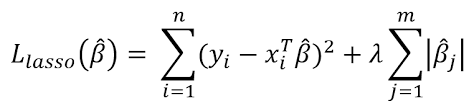

In [66]:
# initialize a Lasso regressor and fit with train data
lasso=Lasso(alpha=0.001,max_iter=1000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001)

In [26]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [67]:
# tune hyperparameters
params={'alpha':[0.0001,0.001,0.01,0.1,0.5,1]}
clf = GridSearchCV(lasso, params)
res=clf.fit(x_train,y_train)
res.best_params_

{'alpha': 0.1}

In [70]:
# initialize and fit lasso regressor with the best hyperparameter
lasso=Lasso(alpha=0.1,max_iter=1000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [71]:
# eval the model
y_val_pred=lasso.predict(x_val)
y_train_pred=lasso.predict(x_train)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val)

train MAE: 1442.2701714508662
val MAE: 1440.342532345438
train Adjusted R-Square: 0.3997606590713796
val Adjusted R-Square: 0.39748031852834387


### Ridge Regression

Ridge is a regularized form of Linear Regression. Here we try to minimize the squared value of the slope along with the MSE/cost function, it's also called L2 regularization. Ridge reduces the coefficients of features but it never reaches to true zero. Lambda is a hyperparameter here.

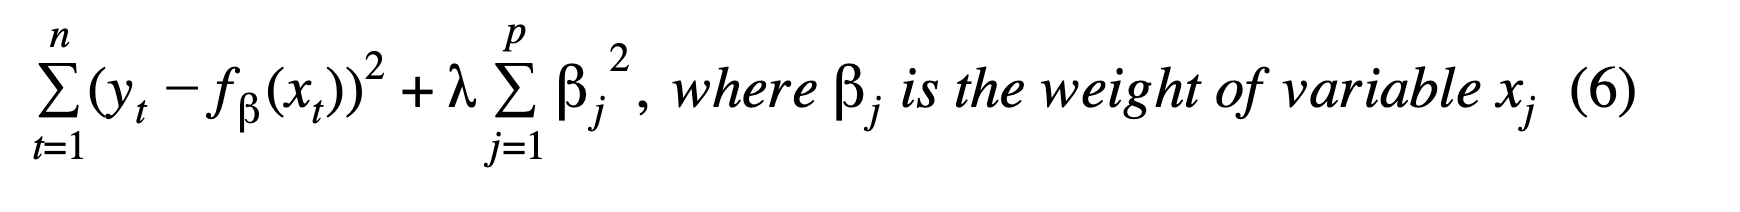

In [61]:
# initialize a Ridge regressor and fit with train data
ridge=Ridge(max_iter=5000)
ridge.fit(x_train,y_train)

Ridge(max_iter=5000)

In [63]:
# tune the hyperparameters
clf = GridSearchCV(ridge, params)
res=clf.fit(x_train,y_train)

In [64]:
res.best_params_

{'alpha': 1}

In [72]:
# eval the model
y_val_pred=ridge.predict(x_val)
y_train_pred=ridge.predict(x_train)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val)

train MAE: 1442.3800229699025
val MAE: 1440.4391824664826
train Adjusted R-Square: 0.39976187435091914
val Adjusted R-Square: 0.3974375680279211


### DecisionTree Regression - with target encoding for categorical features

In [26]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [19]:
# decision tree regressor with k-fold mean encoded categorical features
dt=DecisionTreeRegressor(criterion='absolute_error', splitter='best', max_depth=16, min_samples_split=2, min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

In [20]:
# fit the model with train data
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=16,
                      min_samples_leaf=50)

In [21]:
# eval the model
y_val_pred=dt.predict(x_val)
y_train_pred=dt.predict(x_train)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val)

train MAE: 1284.337423647039
val MAE: 1395.5321652860378
train Adjusted R-Square: 0.3938725022482331
val Adjusted R-Square: 0.3339855428737257


### Decision Tree - With Binary Encoding For Categorical Features

In [ ]:
# decision tree regressor with binary encoded categorical features
dt=DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=16, min_samples_split=2, min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
dt.fit(x_train_bn,y_train)

In [56]:
# run the prediction
y_val_pred=dt.predict(x_val_bn)
y_train_pred=dt.predict(x_train_bn)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val)

train MAE: 1182.3713968078168
val MAE: 1284.5728074553952
train Adjusted R-Square: 0.500046995941164
val Adjusted R-Square: 0.4446822254675269


### Random Forest Regression - With target encoded categorical features

https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
# initialize a random forest regreesion model
rf=RandomForestRegressor(n_estimators=100,criterion='squared_error', max_depth=20, min_samples_split=50, min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [41]:
# tunning hyperparameters for random forest
# max depth - up to which level the tree cann grow
# min_samples_split - minimum number of samples required for a split

params={'max_depth':[10,15,20],'min_samples_split':[5,10,20,40,80]}
clf=RandomizedSearchCV(rf,params)
res=clf.fit(x_train,y_train)
res.best_params_

{'min_samples_split': 20, 'max_depth': 20}

In [42]:
# initialize RF Regressor with the best hyperparamete obtained from the hyperparameter tunning
rf=RandomForestRegressor(n_estimators=100,criterion='squared_error', max_depth=20, min_samples_split=20, min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [43]:
# fit the train data
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, min_samples_split=20)

In [45]:
# evaluate the model
y_val_pred=rf.predict(x_val)
y_train_pred=rf.predict(x_train)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val)

train MAE: 1321.2696364661654
val MAE: 1401.1715376585996
train Adjusted R-Square: 0.4739663802315993
val Adjusted R-Square: 0.4212401565091486


### Random Forest Regression - With Binary Encoding For Categorical Features

In [57]:
# random forest regressor with binary encoded categorical features
rf_binary=RandomForestRegressor(n_estimators=100,criterion='squared_error', max_depth=20, min_samples_split=20, min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=-1, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rf_binary.fit(x_train_bn,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=50, min_samples_split=20,
                      n_jobs=-1)

In [59]:
# run the prediction
y_val_pred=rf_binary.predict(x_val_bn)
y_train_pred=rf_binary.predict(x_train_bn)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val)

train MAE: 1203.023420445547
val MAE: 1261.9769535373218
train Adjusted R-Square: 0.5558393907611199
val Adjusted R-Square: 0.5092702514522012


### XGBRegressor - Target Encoded Categorical Fearture

In [28]:
from xgboost import XGBRegressor

In [40]:
# initialize xgboost regressor
xgb_r = XGBRegressor(n_estimators=100)

In [41]:
# fit the modelwith train data
xgb_r.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [47]:
# run the prediction
y_val_pred=xgb_r.predict(x_val)
y_train_pred=xgb_r.predict(x_train)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val)

train MAE: 1234.3304568173487
val MAE: 1375.3088890535762
train Adjusted R-Square: 0.5936246330039026
val Adjusted R-Square: 0.44664550696656014


### XGBoost Regression With Binary Encoding For Categorical Features

In [48]:
# initialize xgboost regressor
xgb_r = XGBRegressor(n_estimators=100)
xgb_r.fit(x_train_bn,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [51]:
# run the prediction
y_val_pred=xgb_r.predict(x_val_bn)
y_train_pred=xgb_r.predict(x_train_bn)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val_bn)

train MAE: 1086.341128370044
val MAE: 1205.5899972783907
train Adjusted R-Square: 0.6955879308243722
val Adjusted R-Square: 0.555839171869464


##### Let's try with a large number of estimators - 300

In [29]:
# initialize xgboost regressor
xgb_r = XGBRegressor(n_estimators=300)
xgb_r.fit(x_train_bn,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [30]:
# run the prediction
y_val_pred=xgb_r.predict(x_val_bn)
y_train_pred=xgb_r.predict(x_train_bn)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val_bn)

train MAE: 958.961168416731
val MAE: 1218.0375480438825
train Adjusted R-Square: 0.7746704069587843
val Adjusted R-Square: 0.5453553858752127


We can observe that the model is clearly overfitting with a large difference between train and validation MAE, we can try out a lesser number of estimators

##### Let's try with a bit lesser number of estimators - 200

In [21]:
# initialize xgboost regressor
xgb_r = XGBRegressor(n_estimators=200)
xgb_r.fit(x_train_bn,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [27]:
# run the prediction
y_val_pred=xgb_r.predict(x_val_bn)
y_train_pred=xgb_r.predict(x_train_bn)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val_bn)

train MAE: 1013.5239307460077
val MAE: 1210.8748944386728
train Adjusted R-Square: 0.7435934421635662
val Adjusted R-Square: 0.5503707128467332


##### Let's tune other hyperparameters like learning rate, max depth of the tree, regularization etc.

In [72]:
# initialize xgboost regressor
xgb_r = XGBRegressor(n_estimators=100)
# define params to tune
params={'learning_rate':[0.2,0.3,0.4,0.5,0.6,0.8],'max_depth':[4,6,8,10],'reg_alpha':[0,0.2]}
# run randomizedSearchCV
clf=RandomizedSearchCV(xgb_r,params,n_jobs=-1)
res=clf.fit(x_train_bn,y_train)
res.best_params_

{'reg_alpha': 0.2, 'max_depth': 4, 'learning_rate': 0.3}

In [34]:
# initialize xgboost regressor with obtained best params
xgb_r = XGBRegressor(n_estimators=100,reg_alpha=0.4,learning_rate=0.2,max_depth=4)
xgb_r.fit(x_train_bn,y_train)
# run the prediction
y_val_pred=xgb_r.predict(x_val_bn)
y_train_pred=xgb_r.predict(x_train_bn)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val_bn)

train MAE: 1181.0527375819174
val MAE: 1211.3440975372328
train Adjusted R-Square: 0.6164723538048824
val Adjusted R-Square: 0.5476483637058018


### Voting Regressor

##### from sklearn docs:

Prediction voting regressor for unfitted estimators.

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

In [35]:
from sklearn.ensemble import VotingRegressor

In [41]:
vr = VotingRegressor([('randomForest', rf_binary), ('xgb', xgb_r)])

In [42]:
vr.fit(x_train_bn,y_train)

VotingRegressor(estimators=[('randomForest',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_leaf=50,
                                                   min_samples_split=20,
                                                   n_jobs=-1)),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.2, max_delta_step=0,
                                          max_depth=4, min_child_weight=1,
      

In [43]:
# run the prediction
y_val_pred=vr.predict(x_val_bn)
y_train_pred=vr.predict(x_train_bn)
eval_model(y_train,y_train_pred,y_val,y_val_pred,x_train,x_val_bn)

train MAE: 1174.8886365074136
val MAE: 1218.2602430405677
train Adjusted R-Square: 0.6054289687929877
val Adjusted R-Square: 0.5458366936498134


### Consolidating the Results

In [75]:
from prettytable import PrettyTable
  
# Specifying the Column Names while initializing the Table
resTable = PrettyTable(["Model", "Categorical Encoding Schema", "MAE"])
  
# Add rows
resTable.add_row(["Baseline Median Predictor", "K-Fold Target Encoding", "1890"])
resTable.add_row(["Linear Regression", "K-Fold Target Encoding", "1440"])
resTable.add_row(["Lasso", "K-Fold Target Encoding", "1440"])
resTable.add_row(["Ridge", "K-Fold Target Encoding", "1440"])
resTable.add_row(["Decision Tree", "K-Fold Target Encoding", "1395"])
resTable.add_row(["Decision Tree", "Binary Encoding", "1284"])
resTable.add_row(["Random Forest", "K-Fold Target Encoding", "1401"])
resTable.add_row(["Random Forest", "Binary  Encoding", "1261"])
resTable.add_row(["XGBoost", "K-Fold Target Encoding", "1375"])
resTable.add_row(["XGBoost", "Binary Encoding", "1205"])
resTable.add_row(["Voting", "Binary Encoding", "1218"])
  
print(resTable)

+---------------------------+-----------------------------+------+
|           Model           | Categorical Encoding Schema | MAE  |
+---------------------------+-----------------------------+------+
| Baseline Median Predictor |    K-Fold Target Encoding   | 1890 |
|     Linear Regression     |    K-Fold Target Encoding   | 1440 |
|           Lasso           |    K-Fold Target Encoding   | 1440 |
|           Ridge           |    K-Fold Target Encoding   | 1440 |
|       Decision Tree       |    K-Fold Target Encoding   | 1395 |
|       Decision Tree       |       Binary Encoding       | 1284 |
|       Random Forest       |    K-Fold Target Encoding   | 1401 |
|       Random Forest       |       Binary  Encoding      | 1261 |
|          XGBoost          |    K-Fold Target Encoding   | 1375 |
|          XGBoost          |       Binary Encoding       | 1205 |
|           Voting          |       Binary Encoding       | 1218 |
+---------------------------+-----------------------------+---

## Conclusion(s):

1. We are able to obtain better MAE using tree based models than linear models
2. We tried out multiple encoding techniques for categorical features, binary encoding seems to be working better. As we have high cardinat categorical features, trying out different encoding may improve the models
3. We are getting best result using XGboost regression with binary encoded categorical features
4. We can try out more complex models like neural nets as a future scope